# Overview

In [1]:
import pandas as pd

In [2]:
geolocation_data = pd.read_csv(r'C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\data\raw\geolocation_olist_public_dataset.csv')
classified_data = pd.read_csv(r'C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\data\raw\olist_classified_public_dataset.csv').drop('Unnamed: 0', axis=1)
public_customers_data = pd.read_csv(r'C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\data\raw\olist_public_dataset_v2_customers.csv')
public_data = pd.read_csv(r'C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\data\raw\olist_public_dataset_v2.csv')
payments = pd.read_csv(r'C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\data\raw\payments_olist_public_dataset.csv')
translation = pd.read_csv(r'C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\data\raw\product_category_name_translation.csv')
product_measures = pd.read_csv(r'C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\data\raw\product_measures_olist_public_dataset_.csv')
sellers = pd.read_csv(r'C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\data\raw\sellers_olist_public_dataset_.csv')

## Схема базы данных

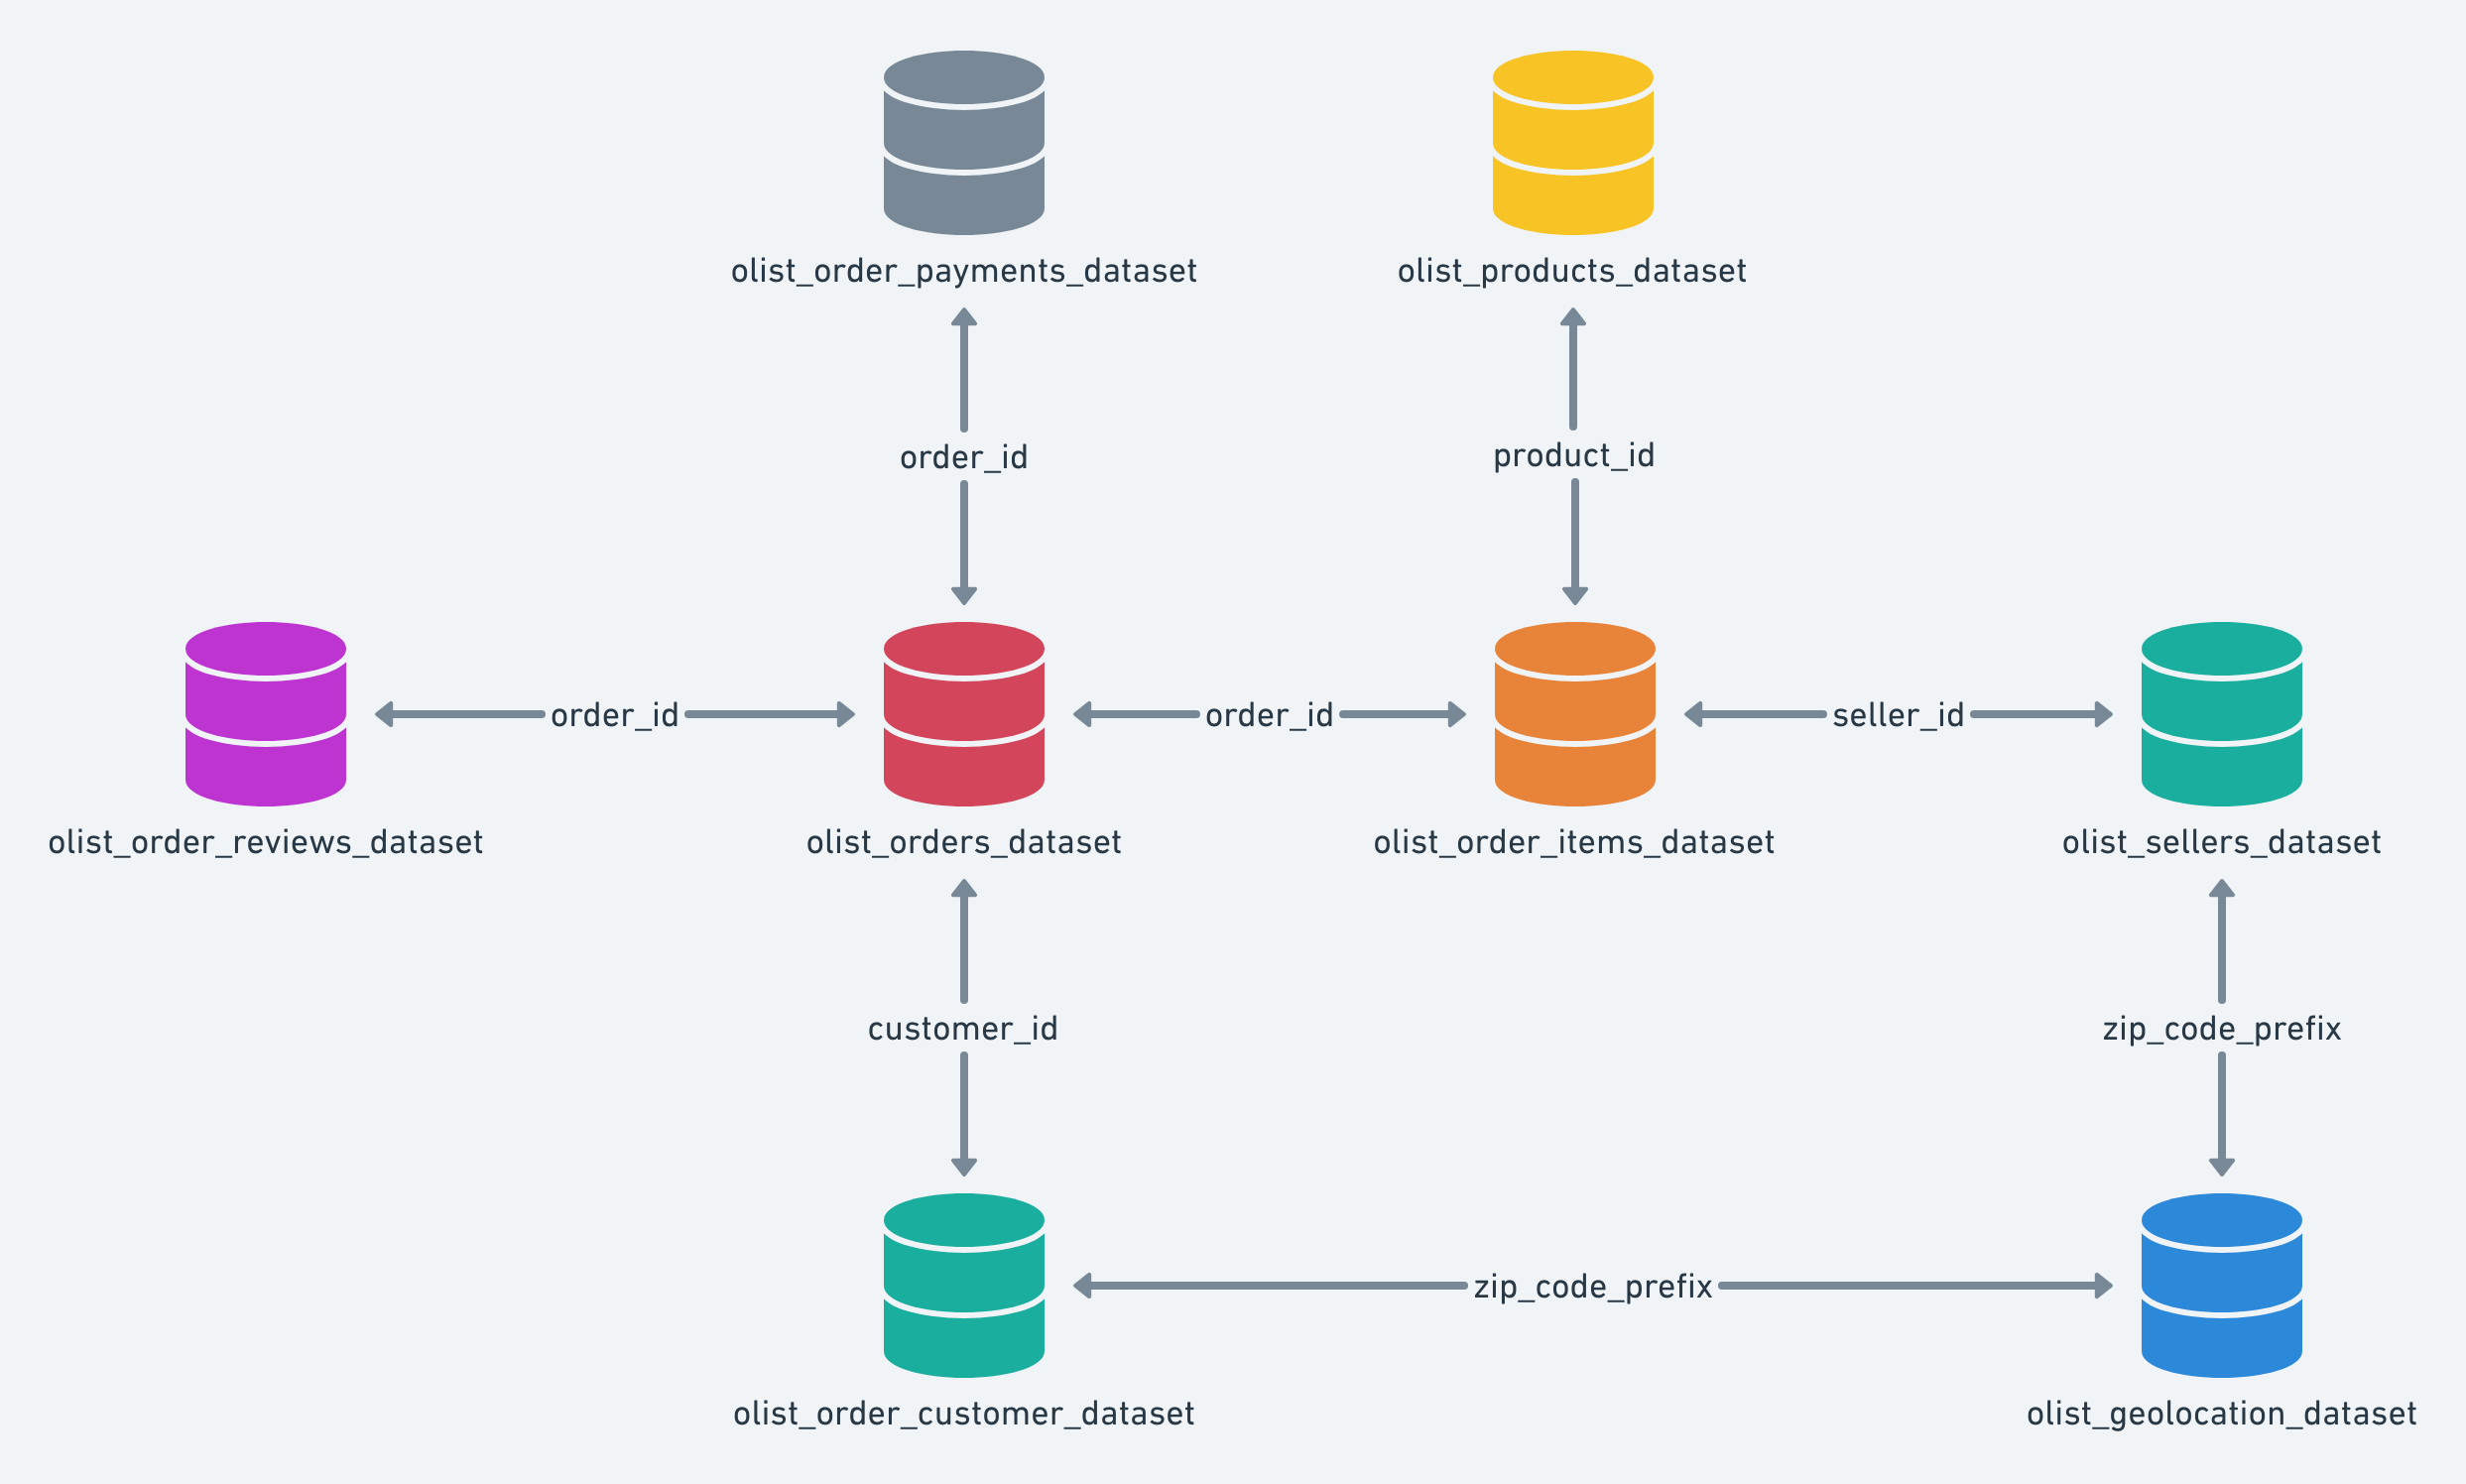

## ВНИМАНИЕ! 

**Данная схема базы данных относится к последней версии датасета. В нашей версии (версия 5, более старая) также присутствует таблица olist_classified_public_dataset.csv, которая сильно схожа с olist_sellers_dataset.csv, но добавляет оценки трёх независимых специалистов некоторых признаков в виде категорий.**

## geolocation_data

In [4]:
display(geolocation_data.head())
print(geolocation_data.shape)
print(geolocation_data.dtypes.nunique())   

,zip_code_prefix,city,state,lat,lng
0,10,sao paulo,sp,-23.547807,-46.636122
1,10,sao paulo,sp,-23.546081,-46.644820
2,10,sao paulo,sp,-23.540984,-46.642569
3,10,sao paulo,sp,-23.546758,-46.645771
4,10,sao paulo,sp,-23.546362,-46.643073


(323016, 5)
3


## classified_data

In [5]:
display(classified_data.head())
print(classified_data.shape)
print(classified_data.dtypes.nunique())

,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class
0,1,delivered,89.99,14.38,1,1,2017-08-30 11:41:01.000000,2017-08-30 11:55:08.970352,2017-09-21 00:00:00.000000,2017-09-08 20:35:27.276847,...,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,2,delivered,69.00,15.23,1,1,2017-09-26 09:13:36.000000,2017-09-26 09:28:10.922048,2017-10-24 00:00:00.000000,2017-09-29 21:13:04.984841,...,0,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido
2,3,delivered,99.80,15.86,2,4,2018-01-15 15:50:42.000000,2018-01-17 07:29:56.419769,2018-02-05 00:00:00.000000,2018-01-23 17:51:31.134866,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
3,4,delivered,87.00,12.74,1,1,2018-02-04 11:16:42.000000,2018-02-06 05:31:50.990164,2018-03-13 00:00:00.000000,2018-02-20 19:38:06.633080,...,3,0,0,0,0,0,0,0,atrasado,problemas_de_entrega
4,5,delivered,99.90,17.95,1,2,2017-12-07 11:58:42.000000,2017-12-08 02:36:49.587515,2018-01-03 00:00:00.000000,2017-12-19 22:33:18.952512,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega


(3584, 33)
3


## public_customers

In [6]:
display(public_customers_data.head())
print(public_customers_data.shape)
print(public_customers_data.dtypes.nunique())   

,customer_id,customer_unique_id
0,0000ca4ff2795842fd6b122c6d974468,ac0e5d7f07043dd32831bdad3b99ad26
1,00010f206878ba01f199aec4237de72e,4ed24aaed4079fe0661c0e4b3b420dff
2,00012a2ce6f8dcda20d059ce98491703,7e0e291c0f4fc2d69208954d26ed0586
3,000161a058600d5901f007fab4c27140,ff1dcb27ea444eddb94ea5fea77b875c
4,00017f1d6cce0d56046219a2cfabcbbb,237130c4b6717031ed62d9d0b16fd94f


(96264, 2)
1


## public_data

In [7]:
display(public_data.head())
print(public_data.shape)
print(public_data.dtypes.nunique())   

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


(100000, 25)
3


## payments

In [8]:
display(payments.head())
print(payments.shape)
print(payments.dtypes.nunique())

,order_id,installments,sequential,payment_type,value
0,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,credit_card,65.71
1,ba78997921bbcdc1373bb41e913ab953,8,1,credit_card,107.78
2,42fdf880ba16b47b59251dd489d4441a,2,1,credit_card,128.45
3,771ee386b001f06208a7419e4fc1bbd7,1,1,credit_card,81.16
4,62fe0bd75deb58982ebf8e53a128a301,1,1,credit_card,15.82


(97433, 5)
3


## translation

In [9]:
display(translation.head())
print(translation.shape)
print(translation.dtypes.nunique())   

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


(71, 2)
1


## product_measures

In [10]:
display(product_measures.head())
print(product_measures.shape)
print(product_measures.dtypes.nunique())   

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00faa46f36261af8bbf3a4d37fa4841b,100.0,21.0,9.0,14.0
1,b497d0032ea073dd58bbd2d7809d25b3,750.0,23.0,5.0,15.0
2,96bd76ec8810374ed1b65e291975717f,200.0,16.0,6.0,19.5
3,506110a1603e772a8ff52ea1f0b0431d,200.0,16.0,13.0,13.0
4,feb593f17c2f51af2932dbba3e99f1cb,50.0,35.0,4.0,26.0


(24439, 5)
2


## sellers

In [11]:
display(sellers.head())
print(sellers.shape)
print(sellers.dtypes.nunique())

,order_id,product_id,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0faabac07131235fc5d9d711471cb4db,40b09f33e646d488df2ca6fec4082d50,3d871de0142ce09b7081e2b9d1733cb1,132,campo limpo paulista,SP
1,970f41d57d6e21afa7b8c701b09acb95,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,371,ilicinea,MG
2,b674ed44cc3f6a869249421debebe104,bd7cd34fc6d02e730221b11edc354aae,46dc3b2cc0980fb8ec44634e21d2718e,222,rio de janeiro,RJ
3,cbe9eae36605cf2bd005c6bc1ae5f864,0e95d6eef2bedaf4ecf3c33f78199059,dc4a0fc896dc34b0d5bfec8438291c80,149,ibitinga,SP
4,f562f8a4adf5a459176f7170d0da220d,9a3a44b7cc16f2592b2110e4205edf97,5a8e7d5003a1f221f9e1d6e411de7c23,130,campinas,SP


(98981, 6)
2
